In [21]:
# Importing the librairies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets 
from sklearn.model_selection import train_test_split
from xgboost import XGBRFRegressor
from sklearn import metrics

<h2>Importing the California house price dataset </h2>

In [22]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [23]:
house_price_dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [24]:
# Loading the dataset into a pandas dataframe
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)
# Without the columns parameter the feature names won't be included

In [25]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [26]:
# Note that the target column is not included therefor we need to include this column
# let's add the target column to the dataframe

house_price_dataframe['price'] = house_price_dataset.target


In [27]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<h2> Statistics </h2>

In [28]:
# checking the number of rows and columns (rows,columns)

house_price_dataframe.shape

(20640, 9)

In [32]:
# checking for missing values
house_price_dataframe.isnull().sum()
# there is no missing values
# In other cases , we can find some missign values wich should be processed before implementing the data in the model

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [33]:
# statistical measures of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<h2> Understanding the correlation between various features in the dataset
 1.Positive Correlation

 2.Negative Correlation

In [36]:
correlation = house_price_dataframe.corr()
#let's use this value to create a heatmap to visuliase the correlation between features and target

<AxesSubplot: >

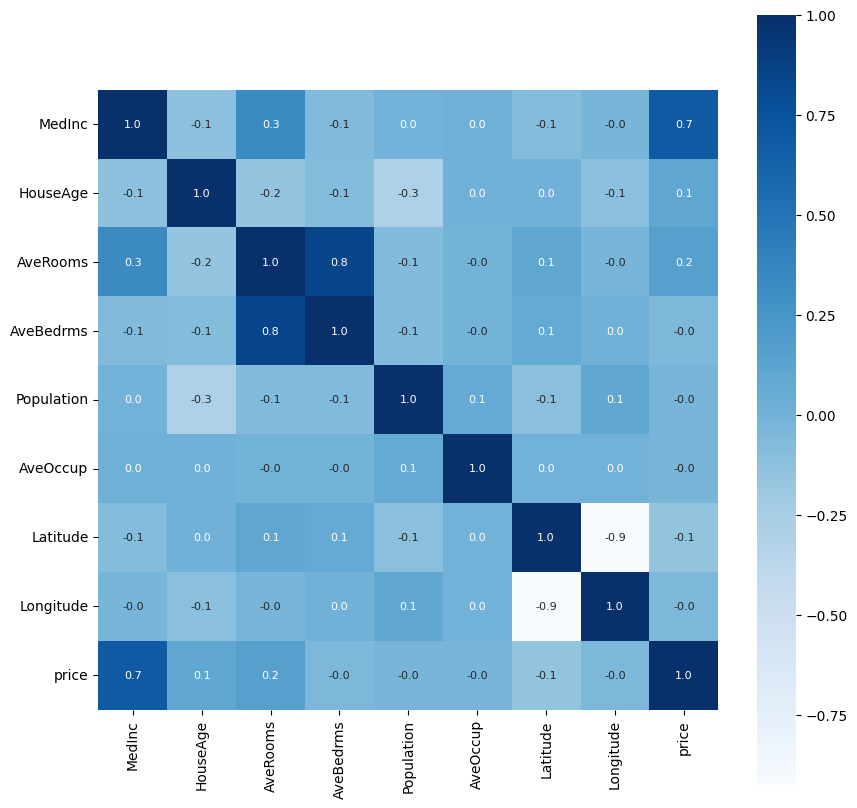

In [37]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

<h1> Splitting the data and target </h1>

In [38]:
# X is all the data except the target (price)
X = house_price_dataframe.drop(['price'], axis=1)  # Nota: axis =1 Is used to drop the entire column , =0 To drop a certain row

# Y is the target column (price)
Y = house_price_dataframe['price']


In [41]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

<h1> Splitting the data into training and testing data

In [47]:
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 2) #20% testing data 80% training data


In [48]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


<h2>Model training using XGBoost Regressor

In [49]:
# loading the model
model = XGBRFRegressor()

In [50]:
# fit the training data (training the model )
model.fit(X_train, Y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

<h1> Evaluating the model

In [51]:
# Evaluate the model 
# Prediction on training data
# accuraccy for prediction on training data
training_data_prediction = model.predict(X_train) #ere the model will predict the house price value and store all these predictions in this variable


In [52]:
print(training_data_prediction)

[0.78045154 3.345669   0.9034427  ... 1.979172   1.7193967  0.93237954]


In [55]:
# R squared error 
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)


print("R squared error : ", score_1)
print("Mean squared error : ", score_2)

R squared error :  0.7230144352550179
Mean squared error :  0.43932887017473693


<h5> The values are pretty small which means our model is performing very well

<h2> Now let's work with the testing data

In [56]:
# prediction on test data
testing_data_prediction = model.predict(X_test) 


In [57]:
# R squared error 
score_3 = metrics.r2_score(Y_test, testing_data_prediction)

# Mean absolute error
score_4 = metrics.mean_absolute_error(Y_test, testing_data_prediction)


print("R squared error : ", score_3)
print("Mean squared error : ", score_4)

R squared error :  0.6953377124106217
Mean squared error :  0.45566551341908385


<H3> The model is performing very good

<h1> Visualising the actual prices on the predicted values

<function matplotlib.pyplot.show(close=None, block=None)>

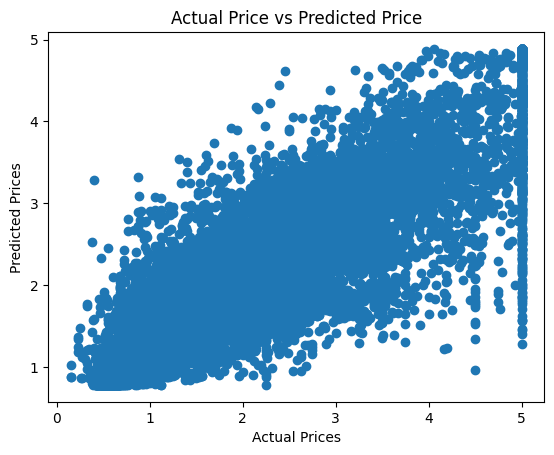

In [61]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show